# Solutions 1

Overall in these series, you will learn how to correctly apply statistics to interpret real-world measurements, and how to use Python to manipulate and present scientific data.

From this first exercise, you should understand how to:
1. generate data samples using numpy and your own functions
2. make simple, but properly constructed plots
3. apply error propagation in the case of uncorrelated variables

## Imports
We firstly import the basic libraries which you will use in this exercise. This should be done once at the start of your script.

In [161]:
from __future__ import print_function   # This is only needed for compatability with Python 2.7. Python 3 users can omit this.
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Display your plots within the notebook or iPython terminal. This is a so-called "magic" operator
# (see https://ipython.org/ipython-doc/3/interactive/tutorial.html#magic-functions). To undo the operation,
# you would use %matplotlib auto
%matplotlib inline

## 1. Generating data
### a) Linspaces
When generating curves, you will most often work with vectors of evenly spaced points over an interval, which you will then use to sample a function. In numpy, this is commonly achieved with the functions `linspace` (which is equivalent to the MATLAB function, for those familiar), and `arange`.

More advanced: see e.g. `ogrid`.

Use linspace to generate a 9 point vector spanning [-0.4,1.2] (including the end points!), giving a step size of 0.2. 

In [162]:
"""
General hint: You can always ask for help from within python if you forgot how a certain function
works or what the correct ordering of input parameters is. Executing “some_function?” spawns
the docstring of the function and “some_function??” the source code.
"""
# np.linspace?

'\nGeneral hint: You can always ask for help from within python if you forgot how a certain function\nworks or what the correct ordering of input parameters is. Executing “some_function?” spawns\nthe docstring of the function and “some_function??” the source code.\n'

In [163]:
x_linspace = np.linspace(-0.4, 1.2, 9)

print('Linspace vector:', x_linspace)
print('Length:', len(x_linspace))
print('Step size:', x_linspace[1]-x_linspace[0])
print('Data type:', type(x_linspace))

Linspace vector: [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2]
Length: 9
Step size: 0.2
Data type: <class 'numpy.ndarray'>


The last line, which checks the datatype, shows that this is not an ordinary list (compare, for example, `type([1,2,3])`), but an `ndarray`. This is a basic datatype in numpy which allows you to conveniently perform certain vector operations e.g. multiplication and addition, which work the way you would expect.

The spacing can also be extracted directly from `linspace` as a second return value using the `retstep=True` argument. Try this and compare.

In [164]:
x_linspace, step_sz = np.linspace(-0.4, 1.2, 9, retstep=True)

print('Manually calculated:', x_linspace[1]-x_linspace[0])
print('Returned:', step_sz)

Manually calculated: 0.2
Returned: 0.2


The function `arange` can be used to do the same thing. In this case, a step parameter is used rather than the number of points, and the end point is generally (but not always!) excluded. Rounding errors can lead to counterintuitive behaviour:

In [165]:
print(np.arange(1, 1.1, 0.1))   # Sometimes the end point is included
print(np.arange(1, 1.2, 0.1))   # And sometimes it is not
print(np.arange(1, 1.3, 0.1))
print(np.arange(1, 1.4, 0.1))
print(np.arange(1, 1.5, 0.1))
print(np.arange(1, 1.6, 0.1))
print(np.arange(1, 1.7, 0.1))

[1.  1.1]
[1.  1.1]
[1.  1.1 1.2 1.3]
[1.  1.1 1.2 1.3]
[1.  1.1 1.2 1.3 1.4]
[1.  1.1 1.2 1.3 1.4 1.5 1.6]
[1.  1.1 1.2 1.3 1.4 1.5 1.6]


In [166]:
# The number of points in arange's output is given by ceil((stop-start)/step).
# Beware of rounding errors!
print(np.ceil((1.1-1.0)/0.1))
print(np.ceil(0.1/0.1))

2.0
1.0


Naturally, this is undesirable behaviour. There are two ways to circumvent it:

* add a half step to your endpoint
* simply use `arange` to generate a list of numbers 0,...,N-1 (taking `N` as the sole parameter), and subsequently scale and translate

The latter is preferred. Use both methods to generate the sequence -0.4,-0.2,...,1.2 with `arange`.

In [167]:
# Beware of rounding errors having unwanted influence on array length!
x_arange1 = np.arange(-0.4, 1.2+epsilon, 0.2)   # Method 1: -0.4 to (1.2+0.2/2), step size 0.2
x_arange2 = np.arange(9)*0.2 - 0.4              # Method 2: generate 0,...,8 and shift/scale the output

print('Method 1:', x_arange1)
print('Method 2:', x_arange2)

Method 1: [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2]
Method 2: [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2]


### b) Functions
Now consider an apple falling from a tree at a height $h$. With a certain acceleration due to gravity $g$, we know that the apple will take a time $t=\sqrt{2h/g}$ to fall to the ground. Write a function with two arguments (parameters), $h$ and $g$, which returns the fall time. Check the output at several points and make sure it matches your hand calculations.

For the square root, you can use either the function from the numpy library, or Python's "raise to the power of" operator `**0.5`.

<div class="alert alert-block alert-info">
<b>Tip:</b> A general list of the basic math routines provided by numpy can be found under https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html.
</div>

In [168]:
def fall_time(h, g):
    return np.sqrt(2*h/g)

g_earth = 9.8
print(fall_time(1, g_earth))
print(fall_time(2, g_earth))


0.4517539514526256
0.6388765649999398


### c) Calculating the theoretical curve
For the function you wrote in 1 b), there is no restriction that `h` and `g` be scalar values. Generate an array of heights at which you want to sample the function, and use it to calculate the expected fall time of the apple for all of them at the same time.

In [169]:
# create a dataset
data_x = np.linspace(0.0, 2.0, 50)
data_y = fall_time(data_x, g_earth)

print(data_y)

[0.         0.09126808 0.12907256 0.15808095 0.18253616 0.20408163
 0.22356023 0.24147264 0.25814512 0.27380424 0.28861501 0.30270198
 0.31616191 0.32907174 0.34149389 0.35347976 0.36507232 0.37630794
 0.38721767 0.39782834 0.40816327 0.41824289 0.42808524 0.43770634
 0.44712046 0.4563404  0.46537772 0.47424286 0.48294529 0.49149366
 0.49989587 0.50815917 0.51629023 0.52429521 0.53217979 0.53994925
 0.54760848 0.55516206 0.56261423 0.56996898 0.57723003 0.58440086
 0.59148477 0.59848483 0.60540396 0.6122449  0.61901024 0.62570244
 0.63232381 0.63887656]


Save the data to file using numpy's `savetxt`, using a comma delimiter and complete with headings. The file should have two columns, which may be achieved using e.g. `column_stack`. Be sure to check the output in a text editor.

In [170]:
# np.savetxt?

In [171]:
# You can also use, e.g. np.c_[data_x, data_y]
np.savetxt('Ex1_apple_curve.csv', np.column_stack([data_x, data_y]), delimiter=',', header='Height(m),Fall time(s)')

## 2. Simple plots

### a) Plotting the theoretical curve
You will now use matplotlib to plot your theoretical curve. The most straightforward way to do this is to work through the "plt" interface directly. See the links below and work from the basic example.

<div class="alert alert-block alert-info">
<b>Tip:</b> You find some help on basic plot functionalities under https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html. For more special plots, first have a look in the gallery https://matplotlib.org/gallery/index.html which already includes many common types of plots.
</div>

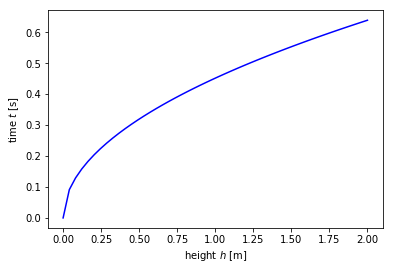

In [172]:
# the simplest way to plot
plt.plot(data_x, data_y,color='blue',label='theory')

# always label the axes (use r'$...$' for latex style)
plt.xlabel(r'height $h$ [m]')
plt.ylabel(r'time $t$ [s]')

# make the plot appear
plt.show()

The plot can be saved directly into pdf, png, etc. using `plt.savefig`. Save this first plot under an appropriate name.

In [173]:
plt.savefig('Ex1_2a_apple_curve.png', dpi=300)

<Figure size 432x288 with 0 Axes>

### b) Loading measurements from a file
Now we will load some actual measurement data from a file. Before working with this in Python, firstly load the file in a text editor. You can see that it contains 4 columns of floating point values, delimited by commas, and with headings on the first row. It is important to understand the format of your data before trying to load it, otherwise you might encounter errors, unexpected behaviour (e.g. skipped rows), or garbled values. This is all the more important for binary data files.

Load the file in using `np.loadtxt(...)`. Be sure to specify the delimiter through the appropriate argument, and to skip the first row, which contains only labels for human eyes.

In [174]:
# np.loadtxt?

In [175]:
# load data from textfile
# format: height time height_error time_error
measurements = np.loadtxt('measurement.csv', delimiter=',', skiprows=1) # TODO: load measurements from measurement.csv

# look at it
print("shape:", measurements.shape, "\n")
print("data:\n", measurements, "\n")
print("first column:", measurements[:, 0], "\n")
print("last row, first two columns:", measurements[-1,0:2])

# Unpack the data
# TODO: Fill in the appropriate slice operators
heights = measurements[:, 0]
times = measurements[:, 1]
height_errors = measurements[:, 2]
time_errors = measurements[:, 3]

shape: (10, 4) 

data:
 [[0.498 0.33  0.01  0.05 ]
 [0.676 0.284 0.01  0.05 ]
 [0.805 0.441 0.01  0.05 ]
 [0.97  0.498 0.01  0.05 ]
 [1.13  0.454 0.01  0.05 ]
 [1.29  0.528 0.01  0.05 ]
 [1.44  0.642 0.01  0.05 ]
 [1.59  0.606 0.01  0.05 ]
 [1.73  0.6   0.01  0.05 ]
 [1.9   0.558 0.01  0.05 ]] 

first column: [0.498 0.676 0.805 0.97  1.13  1.29  1.44  1.59  1.73  1.9  ] 

last row, first two columns: [1.9   0.558]


Now the data has been loaded into a 10x4 array, as shown by the "shape" property, which returns a tuple of the form (n_rows, n_cols, etc). The notation `[:,0]` indicates a slice which contains all rows, and the first column. You can also see that it is possible to select the last element with "-1" (and penultimate with -2, etc) and multiple columns at once with a:b.

<div class="alert alert-block alert-info">
<b>Tip:</b> More information in indexing can be found under https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html and https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html.
</div>

### c) Plotting with error bars
Now we want to plot the measurement data (from the text file) with error bars together with the prediction from theory. In many cases there is a non-negligible uncertainty also on the theoretical prediction. One way of visualizing this is to plot an error band, which in practice can be done by shading the area between two curves.  
In this example, use $\sigma_g = 0.4 \frac{\text{m}}{\text{s}^2}$ as the uncertainty of $g$.  
  
<div class="alert alert-block alert-info">
<b>Tip:</b> There are examples of plots with error bars in the gallery linked above. For more detailed options look at the reference here:  
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html
</div>


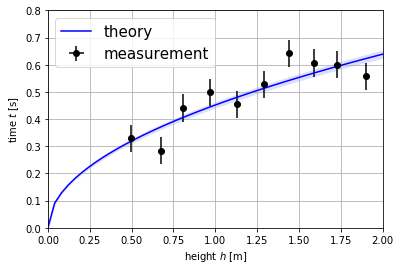

In [176]:
# create an additional dataset for the uncertainty band
data_y_m = fall_time(data_x, true_g - 0.4)
data_y_p = fall_time(data_x, true_g + 0.4)

# plot uncertainty band of theory prediction
plt.fill_between(data_x, data_y_m, data_y_p, facecolor='#ddddff', color='#ddddff')

# plot mean value on top
plt.plot(data_x, data_y, color='blue', label='theory')

# always label the axes (the r'$...$' make the axes have a latex style)
plt.xlabel(r'height $h$ [m]')
plt.ylabel(r'time $t$ [s]')

# plot measurement with errors
plt.errorbar(
    measurements[:,0], measurements[:,1], 
    xerr=measurements[:,2], yerr=measurements[:,3], 
    marker='o', color='black', label='measurement', linestyle='none'
)

# legend
plt.legend(loc='upper left',fontsize='15', numpoints=1)

# optional: set axis limits
plt.xlim([0,2.0])
plt.ylim([0,0.8])

# optional: grid lines
plt.grid(True)

# save the figure to a pdf file
plt.savefig('exercise-1-plot.pdf')

# make the plot appear
plt.show()

### d) Histograms
A qualitative way to check compatibility of the measurement points with theory is to make a histogram of the pulls, or stretches, which are sometimes defined $p_i = \frac{m_i - y_i}{\sigma_i}$. Here $m_i$ is your measured value, index $i$, $y_i$ the expected value, and $\sigma_i$ the uncertainty associated with that particular measurement.

Create the histogram of pulls and overlay the expected pull distribution, which is Gaussian.  

<div class="alert alert-block alert-info">
<b>Tip:</b> Instead of putting the formula for the Gaussian yourself, you can use `scipy.stats.norm.pdf`. See
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
</div>


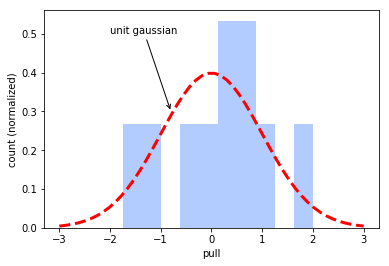

In [177]:
predictions = fall_time(heights, g_earth)

# compute pulls
pulls = (times - predictions)/time_errors

# histogram of pulls
plt.hist(pulls, 10, density=1, 
         histtype='stepfilled', facecolor='#99bbff', alpha=0.75)

# unit gaussian
x = np.linspace(-3.0, 3.0, 50)
plt.plot(x, scipy.stats.norm.pdf(x, 0.0, 1.0), '--', color='r', linewidth=3.0)

# always label the axes, also for histograms
plt.xlabel(r'pull')
plt.ylabel(r'count (normalized)')

# annotation
plt.annotate('unit gaussian', xy=(-0.8, 0.3), 
             arrowprops=dict(arrowstyle='->'), xytext=(-2, 0.5))
    
# save the figure to a pdf file
plt.savefig('exercise-1-histogram.pdf')

plt.show()

## 3. Error propagation with Python
We consider a LC circuit with resonance frequency $\omega_0 = \frac{1}{\sqrt{LC}}$.  
$C = 150 \pm 8 \,\text{pF}$  
$L = 1 \pm 0.1 \,\text{mH}$    
  
What is the resonance frequency and its uncertainty? 

### a) Calculation by hand

The mean value is computed to:   
  
$\omega_0 = \frac{1}{\sqrt{LC}} = 2.58\,\text{MHz}$  
  
Since the uncertainties for both quantities come from independent electronic components, they can safely be assumed as uncorrelated and one can compute the uncertainty of $\omega_0$ to  
$\sigma_{\omega_0} = \sqrt{\left(\frac{\partial \omega_0}{\partial C} \sigma_C\right)^2 + \left(\frac{\partial \omega_0}{\partial L} \sigma_L\right)^2 } = 146\,\text{kHz}$

### b) Installing the 'uncertainties' package
There are packages, which make handling of uncertainties very easy, e.g. the package simply called "uncertainties". It is not included in standard packages of Anaconda and therefore has to be installed with:  

`conda install -c conda-forge uncertainties`  

This can take several minutes, since anaconda has to resolve a lot of dependencies.  

Look at the example on the official website on how to use the library:  
https://pythonhosted.org/uncertainties/  


### c) Using the 'uncertainties' package
  
Define $L$ and $C$ as `ufloat`s and compute the resonance frequency and print the result.  
How can one obtain the central value and the uncertainty separately from the `ufloat` object?


In [178]:
from uncertainties import ufloat
from uncertainties.umath import *

C = ufloat(150e-12, 8e-12)
L = ufloat(1e-3, 0.1e-3)

omega0 = 1/sqrt(L*C)
print(omega0)
print("nominal:",omega0.n)
print("standard deviation:", omega0.s)

(2.58+/-0.15)e+06
nominal: 2581988.8974716114
standard deviation: 146312.704190058


Python gives you more control over how results can be displayed using the `format` function. With this you can, for example, control the number of decimal places, zero pad numbers to a fixed length, or change the representation to hexadecimal.

<div class="alert alert-block alert-info">
<b>Tip:</b> the documentation for string formatting can be found under https://docs.python.org/2/library/string.html#format-string-syntax.
</div>

In [179]:
# A simple example:
print('A float: {:f}'.format(9/7))
print('To two decimal places: {:.2f}'.format(9/7))  # << This is automatically rounded!

# Can work with the ufloat directly.
print('omega0: {:2.1f} MHz'.format(omega0*1e-6))

A float: 1.285714
To two decimal places: 1.29
omega0: 2.6+/-0.1 MHz


Side note: by default, those floating points numbers which do not have an exact binary representation are displayed in Python with many digits after the decimal point. A classic example of this is  1.1 + 2.2:

In [180]:
print(1.1+2.2)

3.3000000000000003


### d) (optional) write your own uncertainty package
We can also try to write our own class for propagating uncertainties. Look at the `myufloat` class below and add the missing pieces marked with **TODO:**. Then test your `myufloat` class with the LC circuit example from above. It should lead to the same result, up to floating point rounding errors.

<div class="alert alert-block alert-info">
<b>Tip:</b> the `__add__`, `__sub__`, `__mul__`, and `__div__` notation below allows you to overload the `+`, `-`, `*`, and `/` operators, respectively. See, for example, https://www.geeksforgeeks.org/operator-overloading-in-python/. In general, it would be ill advised to allow the meaning of these operators drift too far from how they are conventionally understood.
</div>

In [181]:
class myufloat:
    def __init__(self, n, s=0.0):
        self.n = float(n)
        self.s = float(s)
    
    def __add__(self, operand):
        n = self.n + operand.n
        s = np.sqrt(self.s * self.s + operand.s * operand.s)
        return myufloat(n, s)

    def __sub__(self, operand):
        n = self.n - operand.n
        s = np.sqrt(self.s * self.s + operand.s * operand.s)
        return myufloat(n, s)
    
    def __mul__(self, operand):
        n = self.n * operand.n
        r1 = self.s / self.n
        r2 = operand.s / operand.n
        s = np.abs(n) * np.sqrt(r1*r1 + r2*r2)
        return myufloat(n, s)
    
    def __div__(self, operand):
        n = self.n / operand.n
        r1 = self.s / self.n
        r2 = operand.s / operand.n
        s = np.abs(n) * np.sqrt(r1*r1 + r2*r2)
        return myufloat(n, s)
    
    # for Python3
    def __truediv__(self, operand):
        return self.__div__(operand)

    def sqrt(self):
        return myufloat(np.sqrt(self.n), np.abs(0.5/np.sqrt(self.n)*self.s))
    
    def __str__(self):
        return "%1.2e ± %1.2e"%(self.n, self.s)
    
    def __repr__(self):
        return "%1.2e ± %1.2e"%(self.n, self.s)
    

In [182]:
C = myufloat(150e-12, 8e-12)
L = myufloat(1e-3, 0.1e-3)

print(myufloat(1.0)/np.sqrt(C*L))

2.58e+06 ± 1.46e+05


So the results agree for this case!
Let's check some other cases. Create two values with uncertainties:  
  
$a = 1.0 \pm 0.1$  
$b = 2.0 \pm 0.05$  
  
With the uncertainties package `ufloat` and your own implementation `myufloat`, compute:  
  
$c = \frac{a+b}{a-b}$  
  
are they the same? If not, why?

In [183]:
a1 = ufloat(1.0, 0.1)
b1 = ufloat(2.0, 0.05)

a2 = myufloat(1.0, 0.1)
b2 = myufloat(2.0, 0.05)

c1 = (a1+b1)/(a1-b1)
c2 = (a2+b2)/(a2-b2)

print(c1)
print(c2)


-3.0+/-0.4
-3.00e+00 ± 3.54e-01


What is happening here?
We neglected correlations in our `myufloat` class that i.e. the **a** in the numerator and the **a** in the denominator are the same and therefore 100% correlated! The uncertainties package takes this into account.